In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
train_data.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
train_data.shape


(233599, 11)

In [9]:
test_data.shape

(233599, 11)

In [10]:
train_data.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0     

In [11]:
print(train_data.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [13]:
train_data['Product_Category_2'].fillna(train_data['Product_Category_2'].median(), inplace=True)
train_data['Product_Category_3'].fillna(train_data['Product_Category_3'].median(), inplace=True)

In [14]:
print(train_data.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


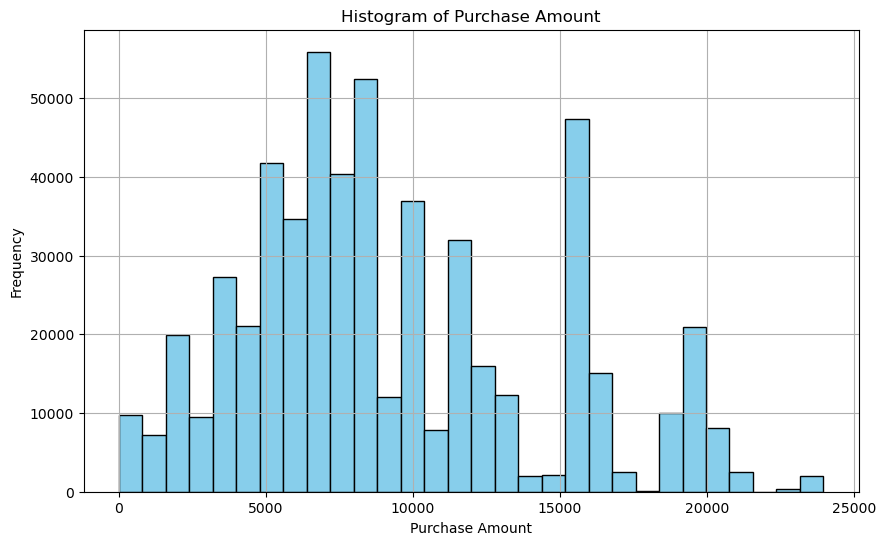

In [16]:
# Histogram of Purchase Amount
plt.figure(figsize=(10, 6))
plt.hist(train_data['Purchase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

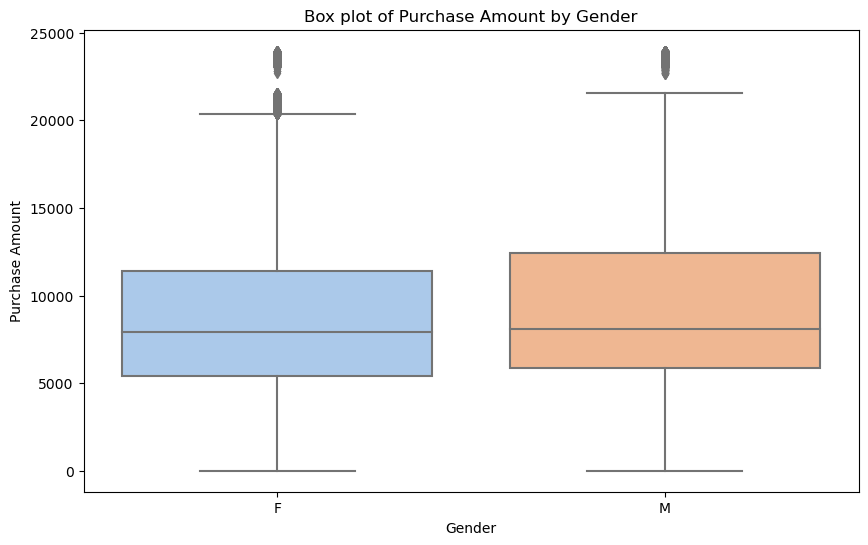

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y=Gender'Purchase', data=train_data, palette='pastel')
plt.title('Box plot of Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

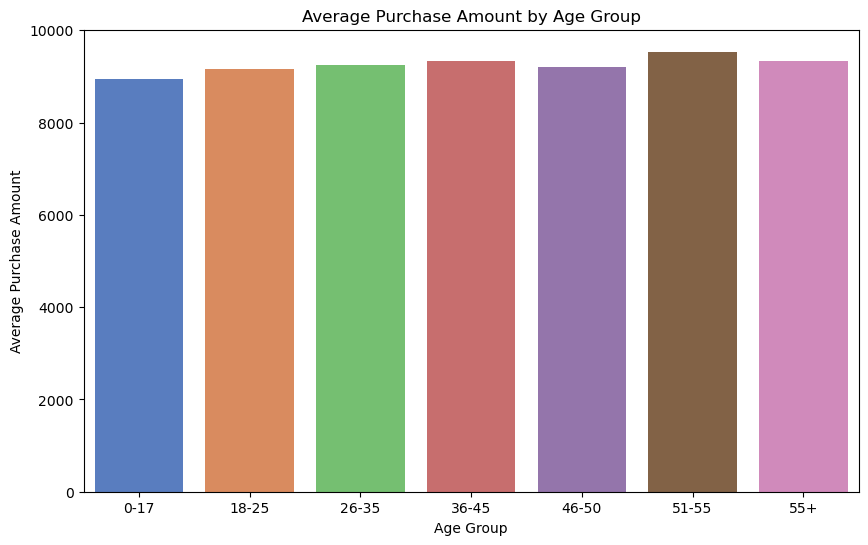

In [19]:
avg_purchase_by_age = train_data.groupby('Age')['Purchase'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Purchase', data=avg_purchase_by_age, palette='muted')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.show()

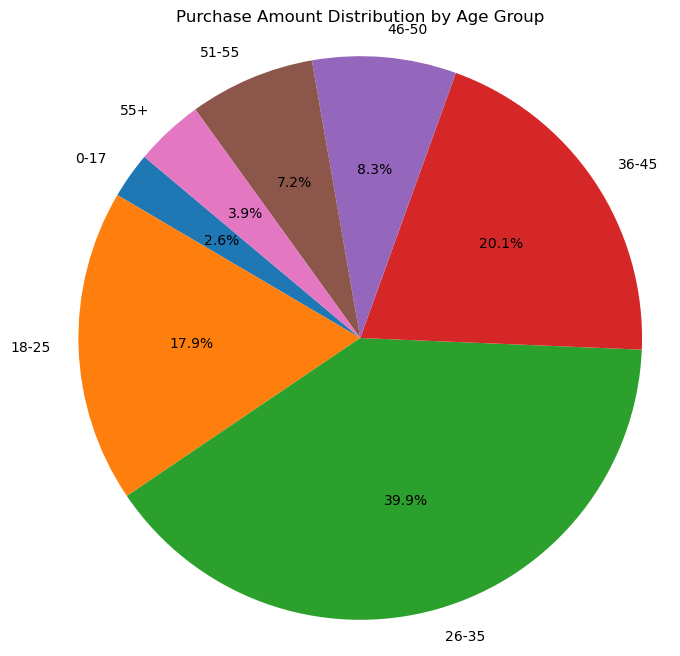

In [22]:
purchase_by_age = train_data.groupby('Age')['Purchase'].sum()


plt.figure(figsize=(8, 8))
plt.pie(purchase_by_age, labels=purchase_by_age.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('Purchase Amount Distribution by Age Group')
plt.axis('equal') 
plt.show()

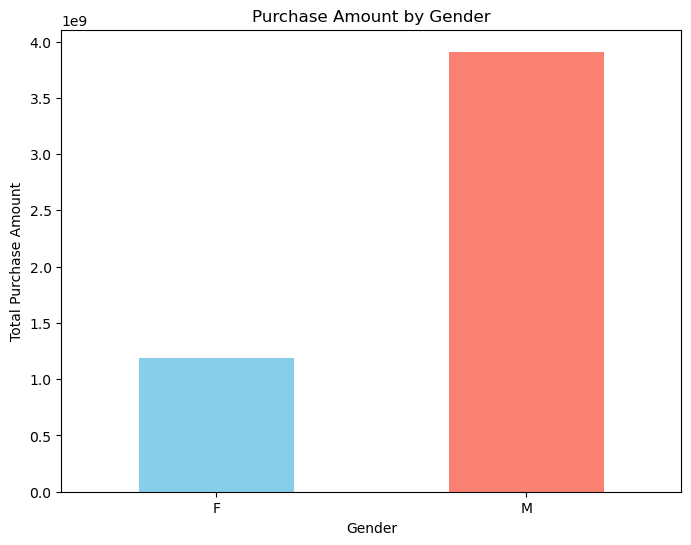

In [23]:
purchase_by_gender = train_data.groupby('Gender')['Purchase'].sum()

plt.figure(figsize=(8, 6))
purchase_by_gender.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)
plt.show()

# Data Modelling

In [26]:
X = train_data.drop(['Purchase', 'User_ID', 'Product_ID'], axis=1)
y = train_data['Purchase']

In [27]:
X = pd.get_dummies(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [31]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

In [32]:
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [38]:
y_pred = model.predict(X_test)

In [49]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error using Random Forest Regressor:", rmse)

Root Mean Squared Error using Random Forest Regressor: 3056.422657880139


In [50]:
rfe = RFE(estimator=DecisionTreeRegressor(),n_features_to_select=10,step=2,verbose=1)
rfe.fit(X_train,y_train)

NameError: name 'RFE' is not defined

C:\Users\prash\anaconda3\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


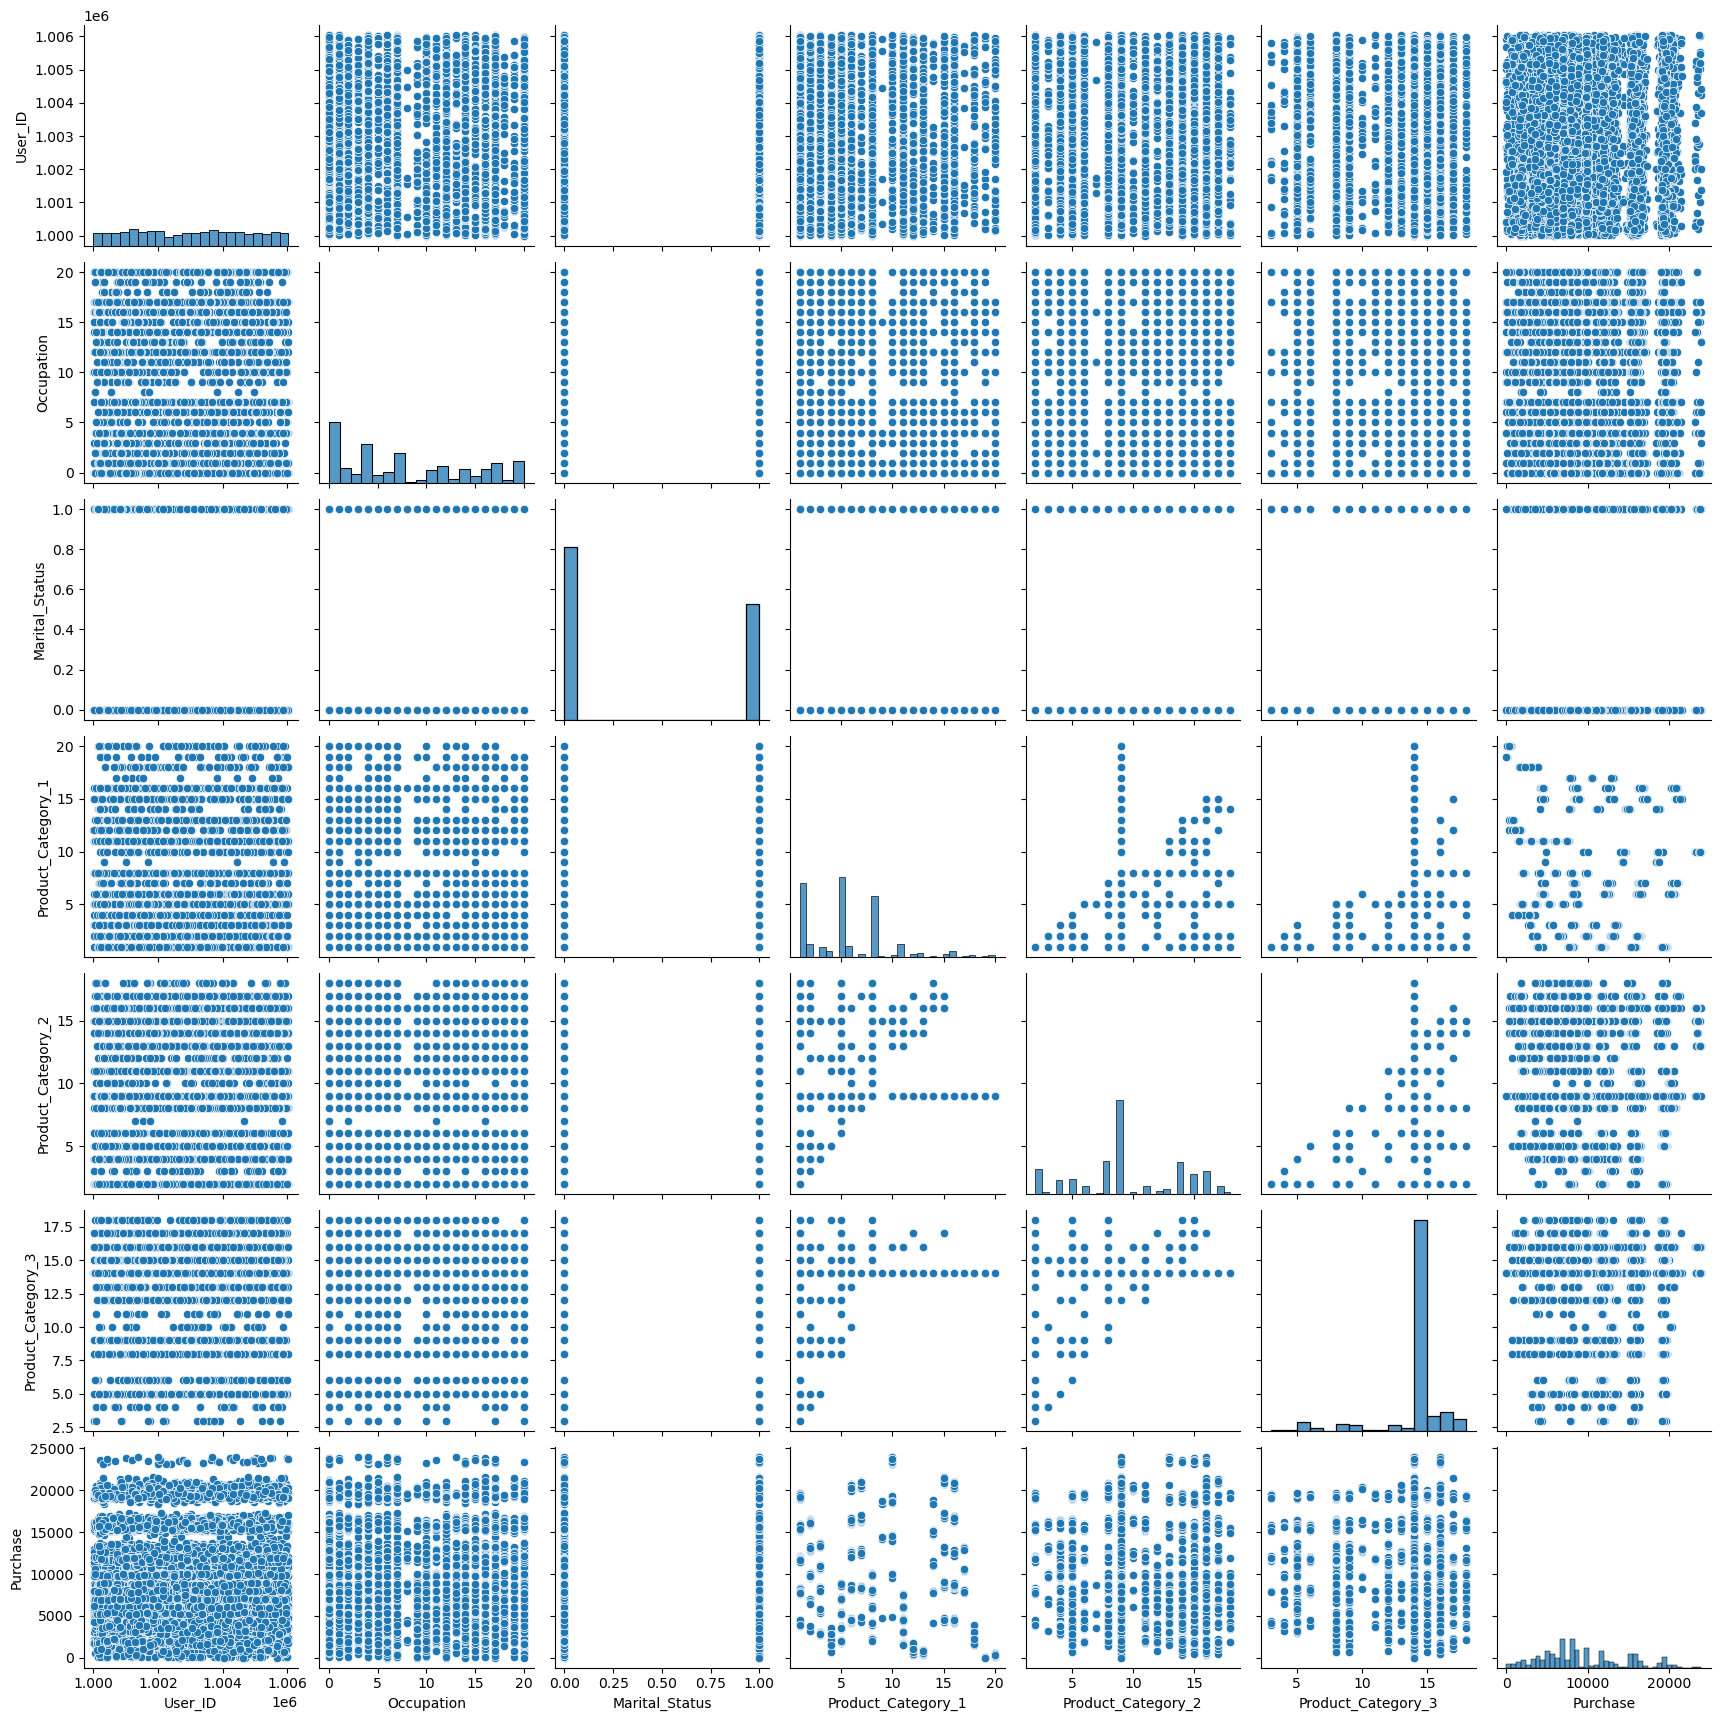

In [48]:
sns.pairplot(train_data.sample(10000));

In [53]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_pred, squared=False)
print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 4685.051176838406


In [54]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print("XGBoost RMSE:", xgb_rmse)

XGBoost RMSE: 2888.7607138323174


In [58]:
xgb_model = SGDRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared=False)
print("SGDRegressior:", xgb_rmse)

SGDRegressior: 5006.42528268642
